### 1. ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is popular and powerful statistical model for time series forecasting.

It is particularly effective for data that shows trends but lacks strong seasonal components.

##### Imagine you're guessing tomorrow's weather based on how similar today is to yesterday and the day before.
- AR looks at past values (lags) and finds a relationship.
- Example: 
  -  If it has been sunny for the past two days, there's a good chance tomorrow will be sunny as well
  - If ice cream sales were high for the past two Saturdays (hot weekends), we might predict high sales this coming Saturday as well.

#### Components of ARIMA:
Consists of three main parts, denoted as (p,d, q):

1. Autoegressive (AR):
- "Use the Past to Predict the Present"
- Uses the relationship between an observation and a specified number of lagged observations.
- Parameter(p): Determines the number of lagged terms to include.
- Example : Predicting today's sales based on the last two days sales.

2. Integrated (I):
- Refers to differencing the data to achieve stationarity (removing trendsand seasonality).
- The integrated part removes trends to make the data stationarity (nolong-term rise/fall).
- Parameters (d): Specifies the number of differences needed to make the series stationary.
- Example: Converting a time series from cumulative sales to dailysales by differencing (subtracting one value from the next).
  - Sales: [100, 200, 300, 400] - Before Differencing 
  - Sales Change: [100, 100, 100] - After Differencing

Stationarity: A time series is stationary if its statistical properties (mean, variance, and autocorrelation) do not change over time.
- Constant mean and variance over time.
- No strong trend
- No seasonality

#### Why is Stationarity Important?
- Many models (like ARIMA) require stationary data because it simplifies forecasting and ensures reliable results.
- Non-stationary data can lead to inaccurate predictions and misleading insights.
- Augmented Dickey-Fuller(ADF) Test: Tests if a series is stationary

3. Moving Average:
- "Smooth out the Noise"
- Uses dependency between an observation and residual errors from a moving average model applied to lagged observations.
- MA learns from past mistakes to smooth out randomness,
- Parameter (q): Determines the number of 

#### Summary 
ARIMA combines these three tools into one model to forecast time series:
- AR(p): How many past values to use?
- I (d): How many differences to make the data stationary?
- MA (q): How many past errors to use?

#### When to use ARIMA:
- Data exhibits trends but lacks strong seasonality.
- Data is not stationary and requires differencing to remove trends.
- Need a reliable model for short- term forecasts.

#### Steps to Build ARIMA Model:
1. Check for Stationarity
- Use visual inspection (line plots) and statistical tests like the Augmented Dickey-Fuller (ADF) Test.
- Stationarity Criteris: Constant mean and variance over time

2. Make Data Stationary (Differencing)
- Aplly differencing to remove trends or seasonality.

3. Identify ARIMA Parameters (p,d, q)
- ACF
- PACF
- D (Integration)
     
4. Fit the Model
- Use libraries like statsmodels in Python to fit the ARIMA model.
     
5. Evaluate the Model
- Use metrics like AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and RMSE (Root Mean Squared Error)

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -44.720
Date:                Tue, 28 Jan 2025   AIC                             99.440
Time:                        20:59:03   BIC                            104.162
Sample:                             0   HQIC                           100.239
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3023      0.581      2.240      0.025       0.163       2.442
ar.L2         -0.3042      0.591     -0.515      0.607      -1.462       0.853
ma.L1         -1.9377     18.112     -0.107      0.9

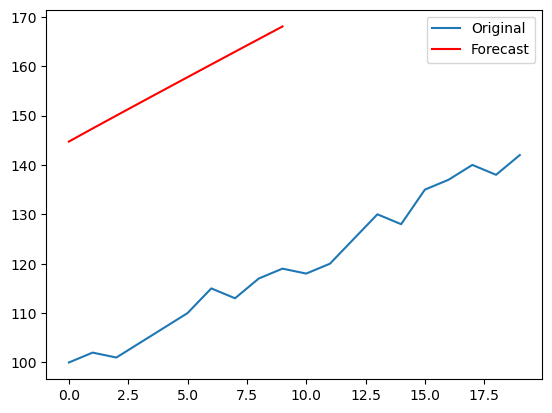

In [7]:
# Sample time series data 
data = {
    "Date": pd.date_range(start="2024-01-01", end="2024-01-20"),
    "Value": [100, 102, 101, 104, 107, 110, 115, 113, 117, 119,
              118, 120, 125, 130, 128, 135, 137, 140, 138, 142],
}

series = data['Value']

# Fit ARIMA Model
model = ARIMA(series, order=(2, 1, 2)) # Example parameters (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=10) # Predict the next 10 steps

# Plot original data and forecast
plt.plot(series, label ='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()